In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [7]:
df = pd.read_csv("C:/Users/admin/Intern/DataSets/bank.csv",sep=";")

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [9]:
df.shape

(4521, 17)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [11]:
df['y'] = df['y'].map({'yes':1, 'no':0})

In [12]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0


In [13]:
encoder = LabelEncoder()
cols = df.select_dtypes(include=['object']).columns
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [14]:
for col in cols:
    df[col] = encoder.fit_transform(df[col])

In [15]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [16]:
X = df.drop('y', axis=1)
y = df['y']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3616, 16), (905, 16), (3616,), (905,))

In [19]:
adaboost = AdaBoostClassifier(
	estimator=DecisionTreeClassifier(max_depth=1),
	n_estimators=200,
	learning_rate=0.8,
	random_state=42
)

In [20]:
adaboost.fit(X_train, y_train)

,estimator,DecisionTreeC...r(max_depth=1)
,n_estimators,200
,learning_rate,0.8
,algorithm,'deprecated'
,random_state,42
,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [21]:
y_pred = adaboost.predict(X_test)

In [22]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.8784530386740331
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       801
           1       0.44      0.22      0.29       104

    accuracy                           0.88       905
   macro avg       0.67      0.59      0.61       905
weighted avg       0.85      0.88      0.86       905



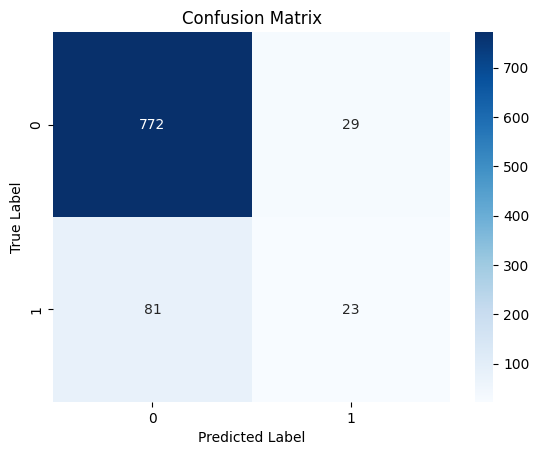

In [23]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [24]:
parameters = {
	'n_estimators': [50, 100, 200],
	'learning_rate': [0.1, 0.5, 0.8, 1.0],
	'estimator__max_depth': [1, 2, 3]
}


In [25]:
base_est = DecisionTreeClassifier()
grid = GridSearchCV(estimator=AdaBoostClassifier(estimator=base_est), param_grid=parameters, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

,estimator,AdaBoostClass...eClassifier())
,param_grid,"{'estimator__max_depth': [1, 2, ...], 'learning_rate': [0.1, 0.5, ...], 'n_estimators': [50, 100, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [26]:
print(grid.best_params_)

{'estimator__max_depth': 3, 'learning_rate': 0.5, 'n_estimators': 200}


In [27]:
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

In [28]:
print("Tuned accuracy score:", accuracy_score(y_test, y_pred_best))

Tuned accuracy score: 0.8939226519337017


In [29]:
sample = pd.DataFrame([{
	'age': 30,
	'job': 10,
	'marital': 1,
	'education': 0,
	'default': 0,
	'balance': 1787,
	'housing': 0,
	'loan': 0,
	'contact': 0,
	'day': 19,
	'month': 10,
	'duration': 79,
	'campaign': 1,
	'pdays': -1,
	'previous': 0,
	'poutcome': 0
}])
sample

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,0


In [31]:
print(best_model.predict(sample))

[0]
